# Task 3

This notebook is part of Milestone 3, Question 3. You can work on this notebook on your laptop to develop your machine learning model using all the learnings from the previous courses. At the end of this notebook, when you are ready to train the model, you will need to obtain the hyperparameters from the hyperparameter tuning job that you will run in Milestone 3 Question 4 (i.e., the notebook named `Milestone3-Task4.ipynb`).

PS: To speed up the process, you can test the model without the hyperparameters first. Once other team members obtain the hyperparameters, you can retrain the model using those hyperparameters and test it again.

In [1]:
# I asked them to use their laptop so they already got all these packages from previous courses.
%pip install joblib scikit-learn matplotlib s3fs

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import dump, load
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

plt.style.use("ggplot")
plt.rcParams.update(
    {"font.size": 16, "axes.labelweight": "bold", "figure.figsize": (8, 6)}
)
## add any other additional packages that you need. You are free to use any packages for vizualization.

## Part 1:

Recall as a final goal of this project. We want to build and deploy ensemble machine learning models in the cloud, where features are outputs of different climate models and the target is the actual rainfall observation. In this milestone, you'll actually build these ensemble machine learning models in the cloud.  

**Your tasks:**

1. Read the data CSV from your s3 bucket. 
2. Drop rows with nans. 
3. Split the data into train (80%) and test (20%) portions with `random_state=123`. 
4. Carry out EDA of your choice on the train split. 
5. Train ensemble machine learning model using `RandomForestRegressor` and evaluate with metric of your choice (e.g., `RMSE`) by considering `Observed` as the target column. 
6. Discuss your results. Are you getting better results with ensemble models compared to the individual climate models? 

> Recall that individual columns in the data are predictions of different climate models. 

### Step 1 - Read the data CSV from your s3 bucket.

In [3]:
## Remember by default it looks for credentials in home directory.
## Make sure your updated credentials are in home directory
## or pass credentials explicitly and pass as storage_options=aws_credentials (not a good idea)
# aws_credentials = {"key": "","secret": "","token":""}
# replace with s3 path to your data
df = pd.read_csv("s3://mds-s3-2-eric/output/ml_data_SYD.csv", index_col=0, parse_dates=True)

In [4]:
## Use your ML skills to get from step 1 to step 6

In [5]:
# df = pd.read_csv("data/ml_data_SYD.csv", index_col=0, parse_dates=True)

In [6]:
df.head()

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,observed_rainfall
time,,,,,,,,,,,,,,,,,,,,,
1889-01-01,0.040427,1.814552,35.579336,4.268112e+00,1.107466e-03,11.410537,3.322009e-08,2.668800,1.321215,1.515293,...,4.244226e-13,1.390174e-13,6.537884e-05,3.445495e-06,1.576096e+01,4.759651e-05,2.451075,0.221324,2.257933,0.006612
1889-01-02,0.073777,0.303965,4.596520,1.190141e+00,1.015323e-04,4.014984,1.312700e+00,0.946211,2.788724,4.771375,...,4.409552e+00,1.222283e-01,1.049131e-13,4.791993e-09,3.675510e-01,4.350863e-01,0.477231,3.757179,2.287381,0.090422
1889-01-03,0.232656,0.019976,5.927467,1.003845e-09,1.760345e-05,9.660565,9.103720e+00,0.431999,0.003672,4.233980,...,2.269300e-01,3.762301e-01,9.758706e-14,6.912302e-01,1.562869e-01,9.561101e+00,0.023083,0.253357,1.199909,1.401452
1889-01-04,0.911319,13.623777,8.029624,8.225225e-02,1.808932e-01,3.951528,1.317160e+01,0.368693,0.013578,15.252495,...,2.344586e-02,4.214019e-01,7.060915e-03,3.835721e-02,2.472226e-07,5.301038e-01,0.002699,2.185454,2.106737,14.869798
1889-01-05,0.698013,0.021048,2.132686,2.496841e+00,4.708019e-09,2.766362,1.822940e+01,0.339267,0.002468,11.920356,...,4.270161e-13,1.879692e-01,4.504985e+00,3.506923e-07,1.949792e-13,1.460928e-10,0.001026,2.766507,1.763335,0.467628


In [7]:
df.shape

(46020, 26)

### Step 2 - Drop rows with nans.

In [8]:
df = df.dropna()

df.shape

(45989, 26)

### Step 3 - Split the data into train (80%) and test (20%) portions with random_state=123.

In [9]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)

X_train, y_train = train_df.drop(columns="observed_rainfall"), train_df["observed_rainfall"]
X_test, y_test = test_df.drop(columns="observed_rainfall"), test_df["observed_rainfall"]

train_df.shape

(36791, 26)

### Step 4 - Carry out EDA of your choice on the train split.

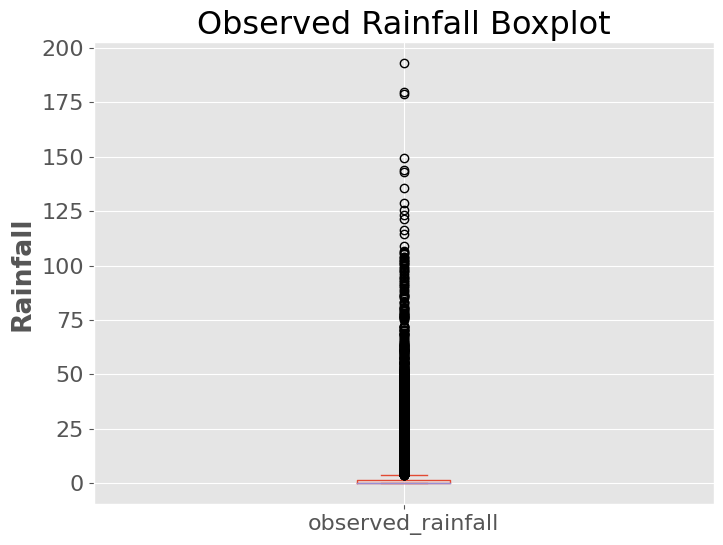

In [10]:
train_df['observed_rainfall'].plot.box()
plt.title("Observed Rainfall Boxplot")
plt.ylabel("Rainfall")
plt.show()

**Observation**: The boxplot suggest there is a lot of outliers with rainfall above 10 cm, while most of the rainfall is below 10 cm.

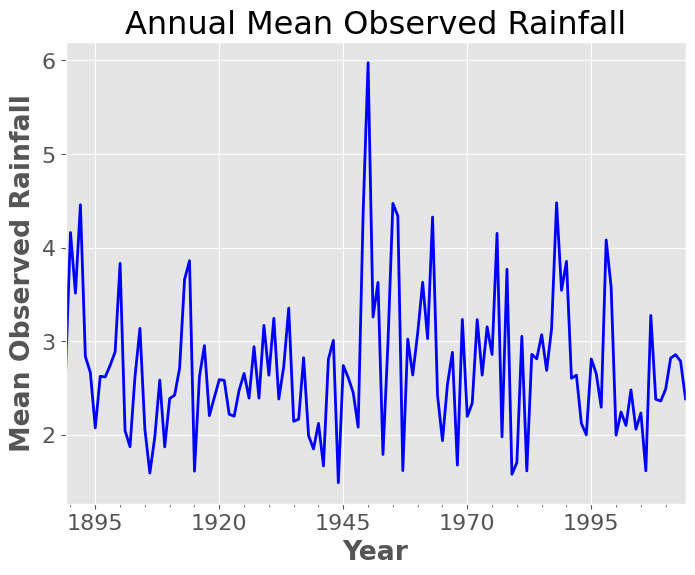

In [11]:
train_df.resample('Y').mean().plot(y="observed_rainfall", title="Annual Mean Observed Rainfall", color="blue", linewidth=2, legend=False)
plt.xlabel("Year")
plt.ylabel("Mean Observed Rainfall")
plt.show()

**Observation**: The mean observed rainfall is ranging from 1 to 6, suggesting low rainfall in Sydney.

In [12]:
plt.hist(train_df['observed_rainfall'], bins = 10)
plt.xlabel('Observed Rainfall')
plt.ylabel('Count')
plt.title('Observed Rainfall Histogram');

**Observation**: The distribution of observed rainfall in Sydney is right-skewed. Most of the observed rainfalls are below 25 cm.

### Step 5 - Train ensemble machine learning model using RandomForestRegressor and evaluate with metric of your choice (e.g., RMSE) by considering Observed as the target column.

In [13]:
%%time
model = RandomForestRegressor(random_state=123)
model.fit(X_train, y_train)

CPU times: user 2min 48s, sys: 147 ms, total: 2min 49s
Wall time: 2min 49s


RandomForestRegressor(random_state=123)

In [14]:
print(
    f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}"
)
print(
    f" Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False):.2f}"
)

Train RMSE: 3.11
 Test RMSE: 8.86


### Step 6 - Discuss your results. Are you getting better results with ensemble models compared to the individual climate models?

In [15]:
%%time
rmse_df = pd.DataFrame({
    "Model": X_test.columns,
    "Train RMSE" : [mean_squared_error(y_train, X_train[column], squared=False) for column in X_train.columns],
    "RMSE": [mean_squared_error(y_test, X_test[column], squared=False) for column in X_test.columns]
}).set_index("Model").sort_values("RMSE")
rmse_df

CPU times: user 24.4 ms, sys: 2 µs, total: 24.4 ms
Wall time: 23.6 ms


,Train RMSE,RMSE
Model,,
KIOST-ESM,9.196532,9.600480
FGOALS-g3,9.284867,9.687788
MRI-ESM2-0,9.609047,9.922795
MPI-ESM1-2-HR,9.489925,9.969823
NESM3,9.371897,9.978137
MPI-ESM1-2-LR,9.681899,10.260886
NorESM2-LM,9.918216,10.410145
EC-Earth3-Veg-LR,9.902149,10.453606
GFDL-CM4,9.889638,10.511682


**Observation**: The RMSE of the individual models are above 9 on the test set, suggesting our ensemble model performs better on the test set with RMSE = 8.86.

## Part 2:

### Preparation for deploying model next week

***NOTE: Complete Question 4 (`Milestone3-task4.ipynb`) from the milestone 3 before coming here***

We’ve found the best hyperparameter settings with MLlib (from the Question 4 from milestone3), here we then use the same hyperparameters to train a scikit-learn model. 

In [16]:
%%time
# Just replace ___ with the numbers you found from Milestone3-task4.ipynb
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=123)
model.fit(X_train, y_train)

CPU times: user 32.7 s, sys: 0 ns, total: 32.7 s
Wall time: 32.7 s


RandomForestRegressor(max_depth=5, random_state=123)

In [17]:
print(
    f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}"
)
print(
    f" Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False):.2f}"
)

Train RMSE: 7.89
 Test RMSE: 8.66


In [ ]:
# ready to deploy
# where this model is saved? Understand the concept of relative path.
dump(model, "model.joblib")

***Upload model.joblib to s3 under output folder. You choose how you want to upload it (using CLI, SDK, or web console).*** Web console is also completely fine as it is a small file.